# Predicting Credit Risk (Using Kaggle Dataset)

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn import preprocessing
print("Import Successful")

Import Successful


### Read & Display Dataset

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [6]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
df.loan_status.value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

### Visualization

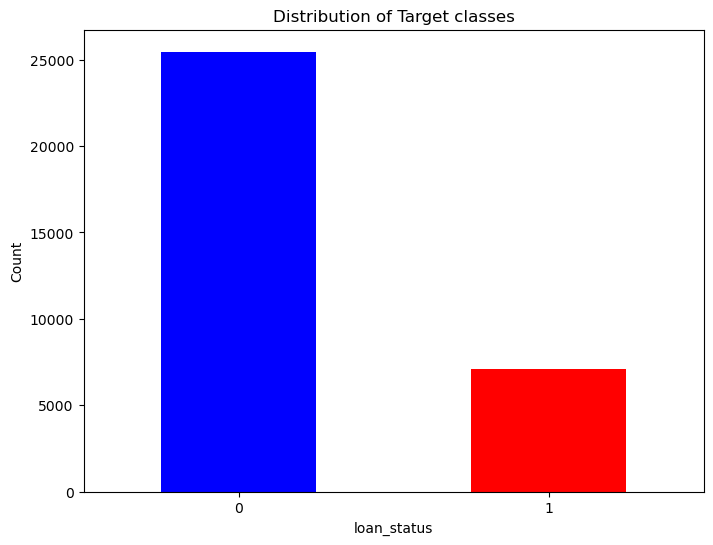

In [8]:
Target_counts = df['loan_status'].value_counts()

# Plotting the distribution
plt.figure(figsize=(8, 6))
Target_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Target classes')
plt.xlabel('loan_status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### From above Diagram we can see that the Dataset is Imbalanced. So we need to balance it later on.

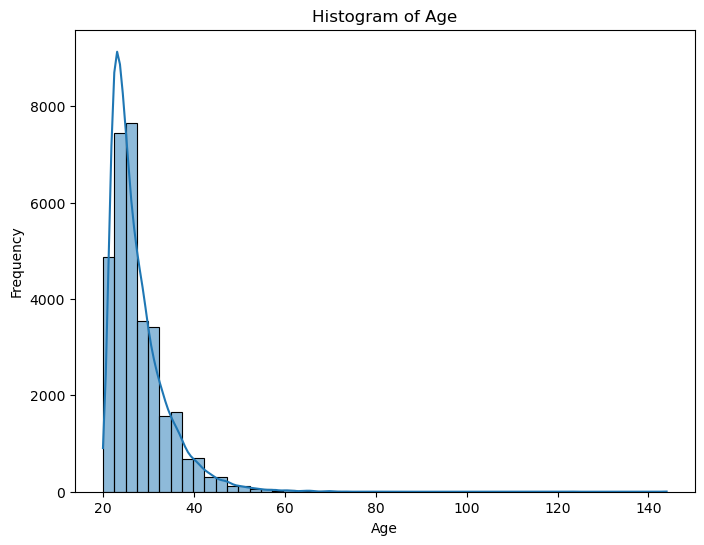

In [9]:
# Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['person_age'], bins=50, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

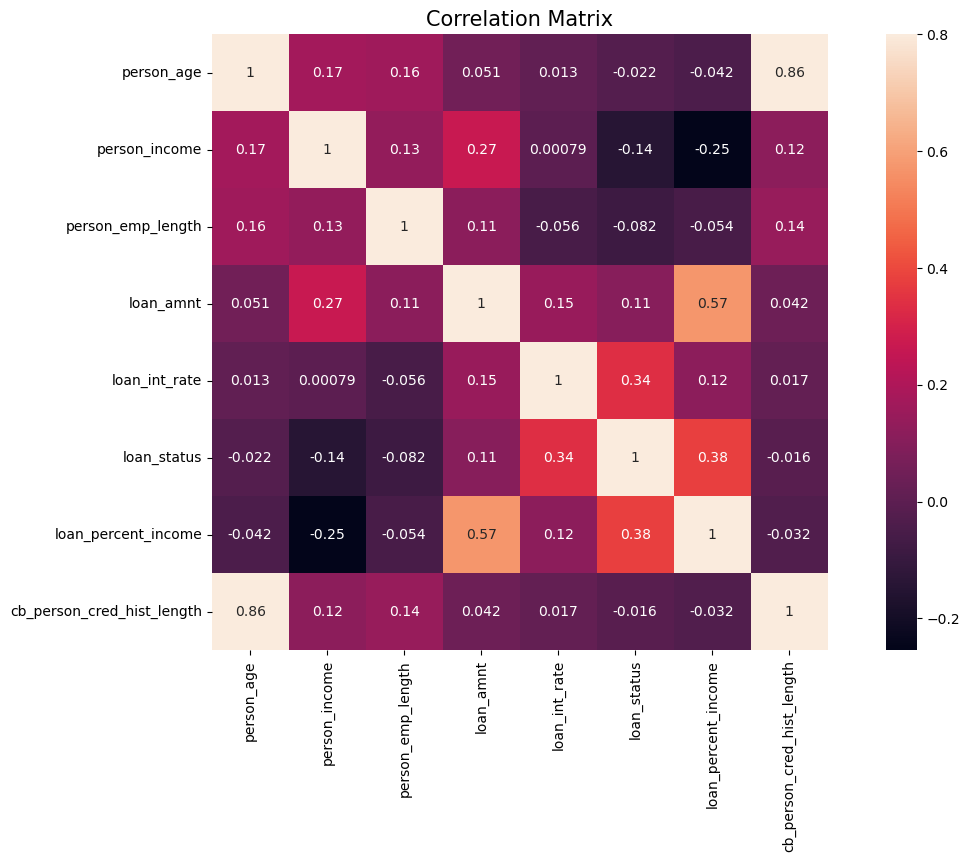

In [11]:
'''
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(df.corr(), vmax =.8, square = True, annot = True )
plt.title('Correlation Matrix',fontsize=15);
'''

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Keep only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation heatmap
sns.heatmap(numeric_df.corr(), vmax=.8, square=True, annot=True)
plt.title('Correlation Matrix', fontsize=15)
plt.show()

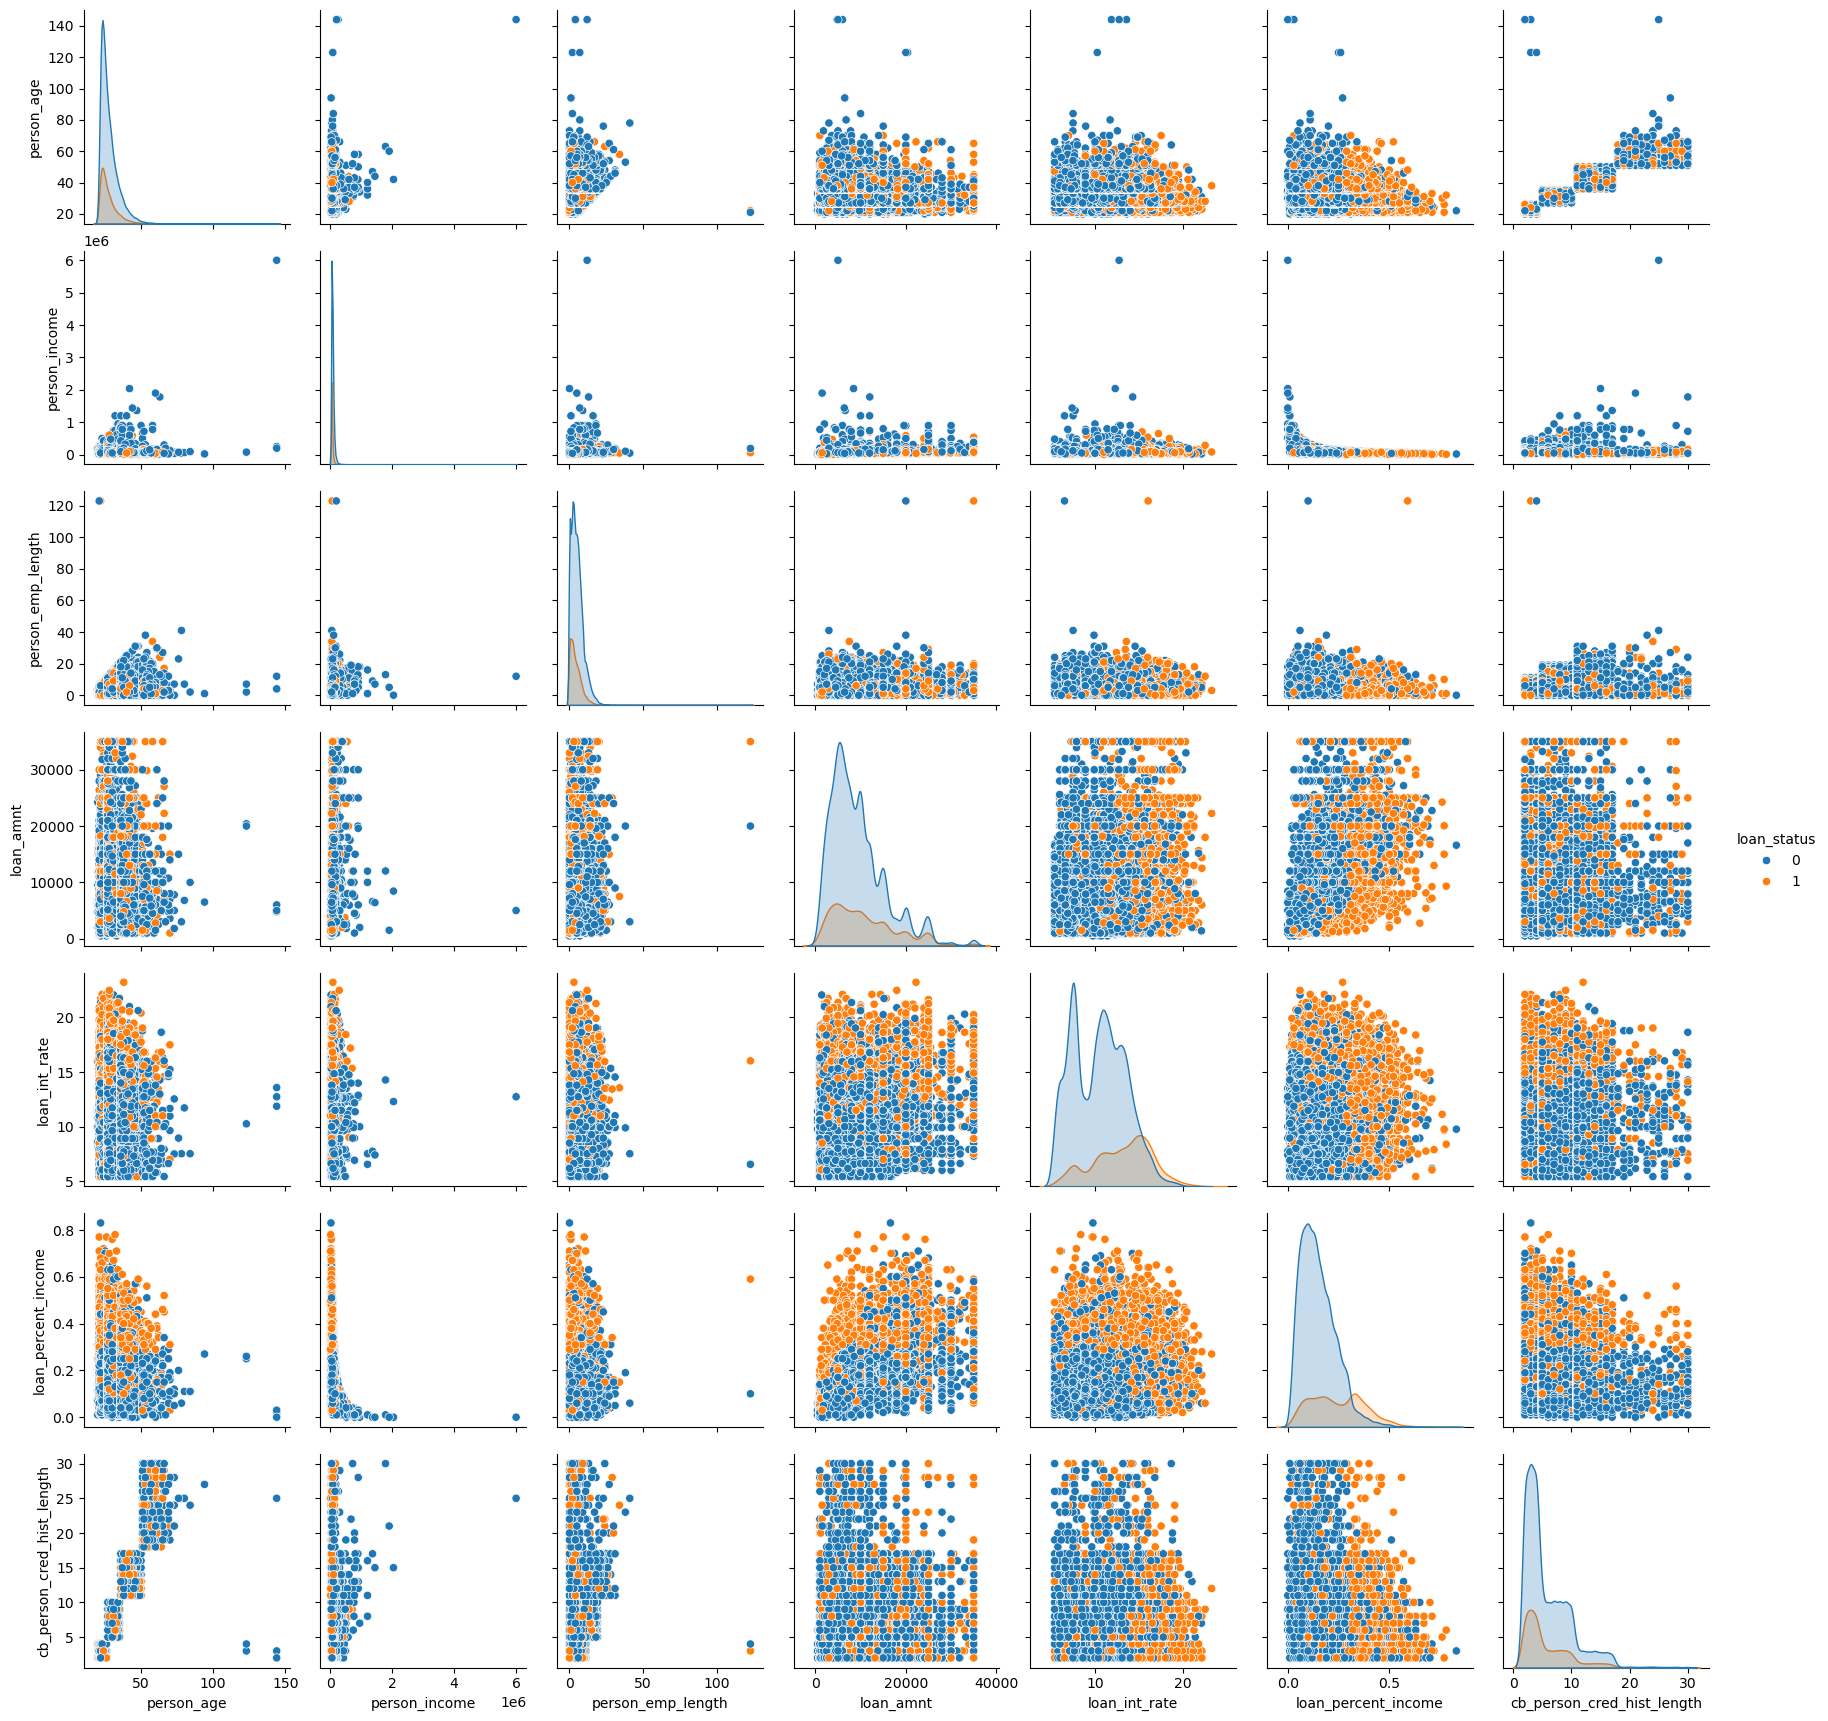

In [12]:
sns.pairplot(df,hue="loan_status")

### Handle Missing Values

In [13]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [14]:
df.dropna(axis=0,inplace=True)

In [15]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### Feature Engineering

In [16]:
df.reset_index(inplace = True)

In [17]:
df = df.drop(df[df['person_age'] > 80].index, axis=0)
df = df.drop(df[df['person_emp_length'] > 60].index, axis=0)

In [18]:
#Convert to categories
df['age_group'] = pd.cut(df['person_age'],
                           bins=[20, 26, 36, 46, 56, 66],
                           labels=['20-25', '26-35', '36-45', '46-55', '56-65'])

df['income_group'] = pd.cut(df['person_income'],
                              bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                              labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])

df['loan_amount_group'] = pd.cut(df['loan_amnt'],
                                   bins=[0, 5000, 10000, 15000, float('inf')],
                                   labels=['small', 'medium', 'large', 'very large'])

In [19]:
df.head()

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group
1,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small
2,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium
3,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large
4,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large
5,5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small


In [20]:
df = df.drop(['index'], axis=1)
df.reset_index(inplace = True)
df = df.drop(['index'], axis=1)

In [21]:
# Create loan-to-income ratio
df['loan_to_income_ratio'] = df['loan_amnt'] / df['person_income']

# Create loan-to-employment length ratio
df['loan_to_emp_length_ratio'] =  df['person_emp_length']/ df['loan_amnt']

# Create interest rate-to-loan amount ratio
df['int_rate_to_loan_amt_ratio'] = df['loan_int_rate'] / df['loan_amnt']

In [22]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small,0.104167,0.005000,0.011140
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium,0.572917,0.000182,0.002340
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large,0.534351,0.000114,0.000435
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large,0.643382,0.000229,0.000408
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small,0.252525,0.000800,0.002856


In [23]:
col_list = ['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length',
'age_group','income_group','loan_amount_group']

drop_colums = []
scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income','loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']
ohe_colums = ['cb_person_default_on_file','loan_grade', 'person_home_ownership','loan_intent','income_group','age_group','loan_amount_group']
le_colums = []

df = df.drop(drop_colums, axis=1)

In [24]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small,0.104167,0.005000,0.011140
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium,0.572917,0.000182,0.002340
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large,0.534351,0.000114,0.000435
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large,0.643382,0.000229,0.000408
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small,0.252525,0.000800,0.002856


### Split Data into X and Y

In [25]:
X = df.drop(['loan_status'], axis=1)
y = df['loan_status']

### Apply One-Hot-Encoding to Categorical Features

In [26]:
import pandas as pd

# Perform one-hot encoding
X = pd.get_dummies(X)

# Print the result
X

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio,...,age_group_56-65,income_group_low,income_group_low-middle,income_group_middle,income_group_high-middle,income_group_high,loan_amount_group_small,loan_amount_group_medium,loan_amount_group_large,loan_amount_group_very large
0,21,9600,5.0,1000,11.14,0.10,2,0.104167,0.005000,0.011140,...,False,True,False,False,False,False,True,False,False,False
1,25,9600,1.0,5500,12.87,0.57,3,0.572917,0.000182,0.002340,...,False,True,False,False,False,False,False,True,False,False
2,23,65500,4.0,35000,15.23,0.53,2,0.534351,0.000114,0.000435,...,False,False,False,True,False,False,False,False,False,True
3,24,54400,8.0,35000,14.27,0.55,4,0.643382,0.000229,0.000408,...,False,False,False,True,False,False,False,False,False,True
4,21,9900,2.0,2500,7.14,0.25,2,0.252525,0.000800,0.002856,...,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28626,57,53000,1.0,5800,13.16,0.11,30,0.109434,0.000172,0.002269,...,True,False,False,True,False,False,False,True,False,False
28627,54,120000,4.0,17625,7.49,0.15,19,0.146875,0.000227,0.000425,...,False,False,False,False,False,True,False,False,False,True
28628,65,76000,3.0,35000,10.99,0.46,28,0.460526,0.000086,0.000314,...,True,False,False,False,True,False,False,False,False,True
28629,56,150000,5.0,15000,11.48,0.10,26,0.100000,0.000333,0.000765,...,False,False,False,False,False,True,False,False,True,False


### Split Train Data into Train and Validation sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [28]:
X_train.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio,...,age_group_56-65,income_group_low,income_group_low-middle,income_group_middle,income_group_high-middle,income_group_high,loan_amount_group_small,loan_amount_group_medium,loan_amount_group_large,loan_amount_group_very large
6793,22,35350,3.0,7000,9.99,0.20,3,0.198020,0.000429,0.001427,...,False,False,True,False,False,False,False,True,False,False
25665,41,49000,4.0,25000,17.04,0.51,13,0.510204,0.000160,0.000682,...,False,False,True,False,False,False,False,False,False,True
10140,25,67000,9.0,10000,13.92,0.15,3,0.149254,0.000900,0.001392,...,False,False,False,True,False,False,False,True,False,False
12581,24,104000,9.0,14000,9.99,0.13,3,0.134615,0.000643,0.000714,...,False,False,False,False,False,True,False,False,True,False
16639,29,20400,4.0,2000,7.90,0.10,9,0.098039,0.002000,0.003950,...,False,True,False,False,False,False,True,False,False,False


In [29]:
print(X_train.shape,X_test.shape)

(22904, 43) (5727, 43)


In [30]:
'''import sklearn
print (sklearn.__version__)

import imblearn.over_sampling
print(imblearn.__version__)
'''

'import sklearn\nprint (sklearn.__version__)\n\nimport imblearn.over_sampling\nprint(imblearn.__version__)\n'

In [33]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

'''
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))
[(0, 4674), (1, 4674), (2, 4674)]
clf_smote = LogisticRegression().fit(X_resampled, y_resampled)
X_resampled, y_resampled = ADASYN().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))
[(0, 4673), (1, 4662), (2, 4674)]
clf_adasyn = LogisticRegression().fit(X_resampled, y_resampled)
'''

'\nX_resampled, y_resampled = SMOTE().fit_resample(X, y)\nprint(sorted(Counter(y_resampled).items()))\n[(0, 4674), (1, 4674), (2, 4674)]\nclf_smote = LogisticRegression().fit(X_resampled, y_resampled)\nX_resampled, y_resampled = ADASYN().fit_resample(X, y)\nprint(sorted(Counter(y_resampled).items()))\n[(0, 4673), (1, 4662), (2, 4674)]\nclf_adasyn = LogisticRegression().fit(X_resampled, y_resampled)\n'

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit scaler on training data and transform training data
X_train= scaler.fit_transform(X_train)

# Transform test data using the scaler fitted on training data
X_test = scaler.transform(X_test)

### **Models**

## XGBoost

In [36]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb
# Create an XGBoost classifier (you can adjust hyperparameters)
model = xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [37]:
test_accuracy = accuracy_score(y_test, y_pred)
test_report = classification_report(y_test, y_pred)

print("Testing Set Accuracy:", test_accuracy)
print("Testing Set Classification Report:\n", test_report)

Testing Set Accuracy: 0.9388859786973983
Testing Set Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      4486
           1       0.97      0.74      0.84      1241

    accuracy                           0.94      5727
   macro avg       0.95      0.87      0.90      5727
weighted avg       0.94      0.94      0.94      5727



In [38]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.9388859786973983
Precision: 0.9664921465968587
Recall: 0.7437550362610797
F1 Score: 0.8406193078324226


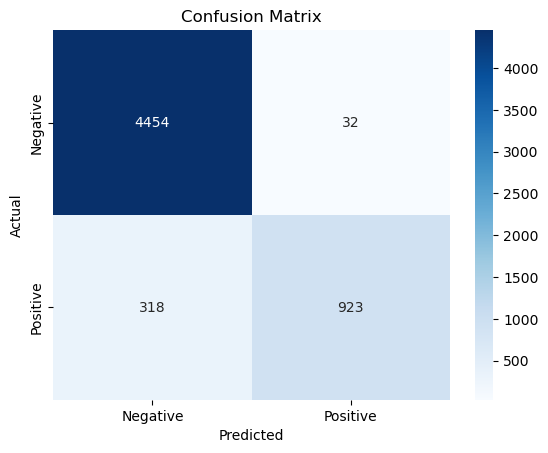

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()